In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [8]:
df = pd.read_csv("data/valeursfoncieres-2020.txt", delimiter = "|",low_memory=False)

In [3]:
from utils import alldrop, cleaner, drop2

df = alldrop(df)
df = cleaner(df)
df = drop2(df)
df

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Surface Carrez du 1er lot,Type local,Nombre pieces principales,id_vente
0,2020-01-06,54800.0,6.0,AV,0770,DU CHAMP DE FOIRE,1000.0,BOURG-EN-BRESSE,01,53,31.68,Appartement,1.0,1
1,2020-01-13,97000.0,16.0,RUE,1770,DES GRAVES,1000.0,BOURG-EN-BRESSE,01,53,78.03,Appartement,3.0,2
2,2020-01-07,96000.0,12.0,ALL,3044,DE LA PETITE REYSSOUZE,1000.0,BOURG-EN-BRESSE,01,53,74.07,Appartement,3.0,3
3,2020-01-09,99000.0,18.0,RUE,1770,DES GRAVES,1000.0,BOURG-EN-BRESSE,01,53,91.47,Appartement,4.0,4
4,2020-01-08,70000.0,5.0,RUE,1320,EDGAR QUINET,1000.0,BOURG-EN-BRESSE,01,53,48.48,Appartement,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284209,2020-12-22,141293.0,11.0,RUE,8922,DU SENTIER,75002.0,PARIS 02,75,102,15.82,Appartement,1.0,284210
284210,2020-12-22,735000.0,7.0,RUE,0440,D ARGOUT,75002.0,PARIS 02,75,102,58.50,Appartement,3.0,284211
284211,2020-12-29,151000.0,2.0,RUE,1223,BOUTAREL,75004.0,PARIS 04,75,104,9.64,Appartement,1.0,284212
284212,2020-12-23,160010.0,147.0,RUE,8525,SAINT-DENIS,75002.0,PARIS 02,75,102,12.71,Appartement,1.0,284213


<AxesSubplot:xlabel='count', ylabel='Type local'>

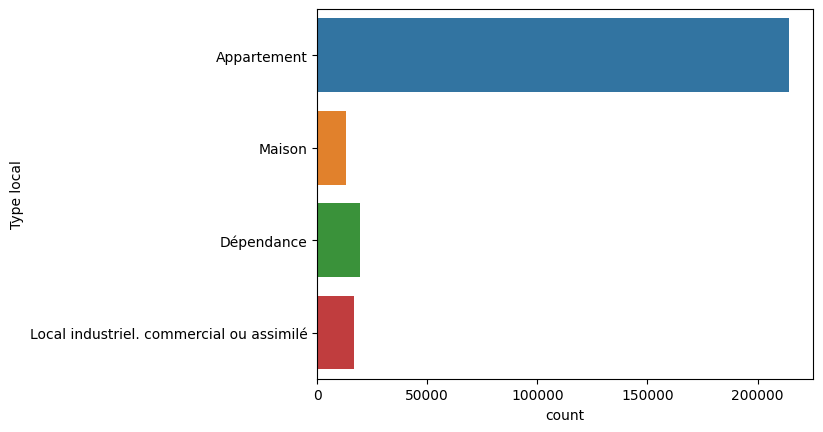

In [4]:
sns.countplot(y=df["Type local"])

In [5]:
plt.figure(figsize=(12, 6))

# Tracer le graphique avec hue par "Type local"
sns.countplot(y=df["Nature mutation"], hue=df["Type local"])

# Ajouter une légende et la déplacer vers la droite
plt.legend(title="Type local", loc='lower right')

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Nature mutation")
plt.title("Nombre d'occurrences par nature de mutation avec hue par type local")

# Afficher le graphique
plt.show()

KeyError: 'Nature mutation'

<Figure size 1200x600 with 0 Axes>

In [6]:
df.isna().sum()

Code service sages            3509085
Reference document            3509085
1 Articles CGI                3509085
2 Articles CGI                3509085
3 Articles CGI                3509085
4 Articles CGI                3509085
5 Articles CGI                3509085
No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 49888
No voie                       1398616
B/T/Q                         3355288
Type de voie                  1458402
Code voie                       31974
Voie                            32010
Code postal                     32117
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            3339067
Section                           110
No plan                             0
No Volume                     3499816
1er lot                       2412435
Surface Carrez du 1er lot     3221488
2eme lot    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263848 entries, 0 to 284213
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date mutation              263848 non-null  datetime64[ns]
 1   Valeur fonciere            263848 non-null  float64       
 2   No voie                    263848 non-null  float64       
 3   Type de voie               263848 non-null  object        
 4   Code voie                  263848 non-null  object        
 5   Voie                       263848 non-null  object        
 6   Code postal                263848 non-null  float64       
 7   Commune                    263848 non-null  string        
 8   Code departement           263848 non-null  string        
 9   Code commune               263848 non-null  int64         
 10  Surface Carrez du 1er lot  263848 non-null  float64       
 11  Type local                 263848 non-null  string       

<AxesSubplot:xlabel='count', ylabel='Type local'>

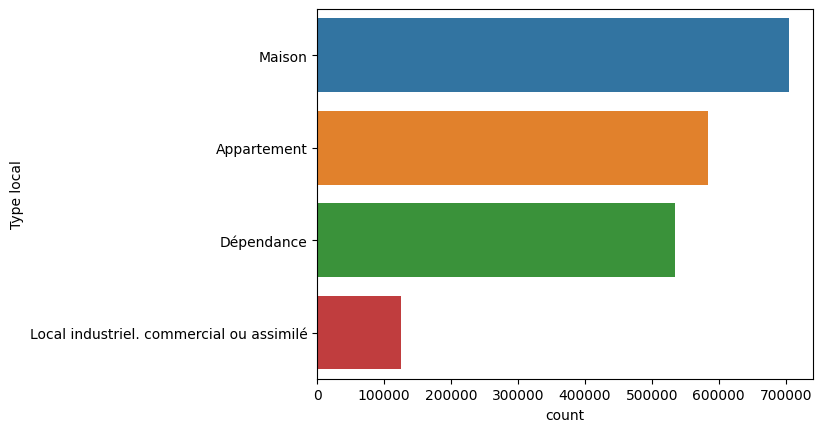

In [8]:
sns.countplot(y=df["Type local"])

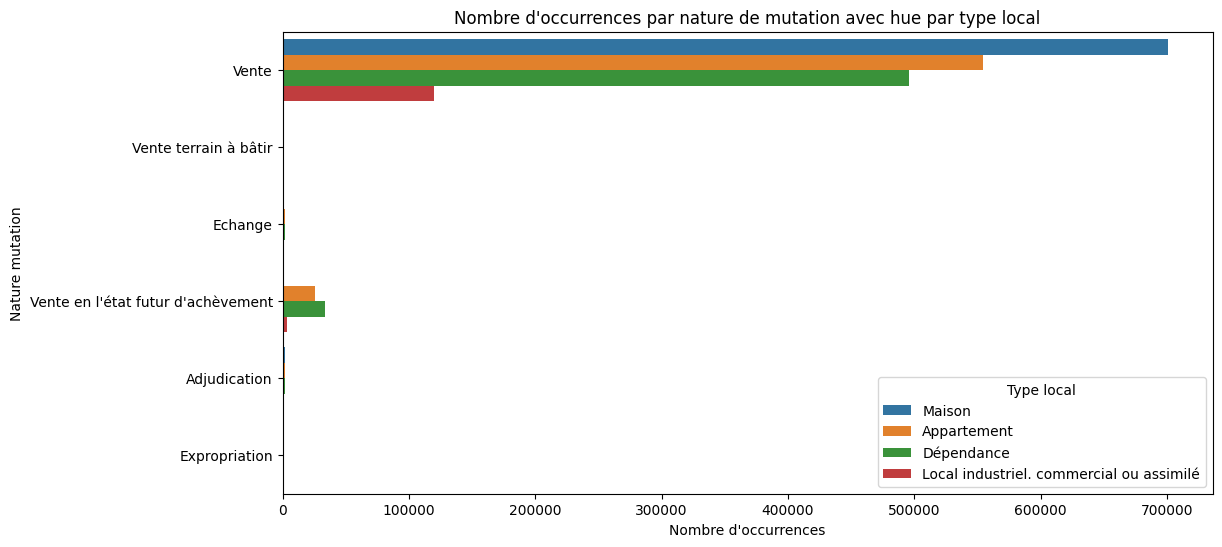

In [32]:

plt.figure(figsize=(12, 6))

# Tracer le graphique avec hue par "Type local"
sns.countplot(y=df["Nature mutation"], hue=df["Type local"])

# Ajouter une légende et la déplacer vers la droite
plt.legend(title="Type local", loc='lower right')

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Nature mutation")
plt.title("Nombre d'occurrences par nature de mutation avec hue par type local")

# Afficher le graphique
plt.show()


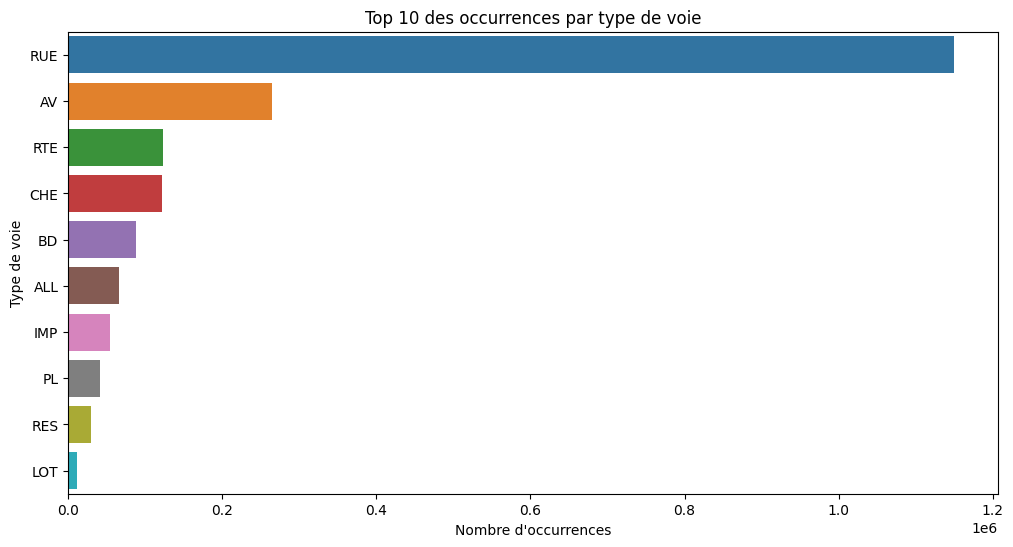

In [25]:
top_10_values = df["Type de voie"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))

# Tracer le graphique
sns.barplot(x=top_10_values.values, y=top_10_values.index, orient="h")

# Ajouter des étiquettes et un titre
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Type de voie")
plt.title("Top 10 des occurrences par type de voie")

# Afficher le graphique
plt.show()

In [13]:
df_appart = df[df["Type local"]=="Appartement"]
df_appart

,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2020,Vente,...,NaN,2,2.0,Appartement,NaN,32.0,1.0,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2020,Vente,...,NaN,0,2.0,Appartement,NaN,45.0,2.0,S,NaN,195.0
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2020,Vente,...,NaN,0,2.0,Appartement,NaN,50.0,2.0,S,NaN,195.0
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13/01/2020,Vente,...,NaN,1,2.0,Appartement,NaN,92.0,3.0,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,2,2.0,Appartement,NaN,74.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,2.0,Appartement,NaN,29.0,2.0,S,NaN,447.0
3509081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,2.0,Appartement,NaN,40.0,2.0,S,NaN,447.0
3509082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,2.0,Appartement,NaN,24.0,1.0,S,NaN,447.0
3509083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,2.0,Appartement,NaN,40.0,2.0,S,NaN,447.0


In [10]:
df_appart["Date mutation"] = pd.to_datetime(df_appart["Date mutation"],format="%d/%m/%Y")

/tmp/ipykernel_28245/2230977734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appart["Date mutation"] = pd.to_datetime(df_appart["Date mutation"],format="%d/%m/%Y")


In [11]:
df_appart['Valeur fonciere'] = df_appart['Valeur fonciere'].str.replace(",",".")
df_appart['Valeur fonciere'] = df_appart['Valeur fonciere'].astype(float)

/tmp/ipykernel_28245/1710010238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appart['Valeur fonciere'] = df_appart['Valeur fonciere'].str.replace(",",".")
/tmp/ipykernel_28245/1710010238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appart['Valeur fonciere'] = df_appart['Valeur fonciere'].astype(float)


In [14]:
from utils import alldrop, cleaner, drop2

df_appart = alldrop(df_appart)
df_appart = cleaner(df_appart)
df_appart = drop2(df_appart)
df_appart

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Surface Carrez du 1er lot,Type local,Nombre pieces principales,id_vente
0,2020-01-06,54800.0,6.0,AV,0770,DU CHAMP DE FOIRE,1000.0,BOURG-EN-BRESSE,01,53,31.68,Appartement,1.0,1
1,2020-01-13,97000.0,16.0,RUE,1770,DES GRAVES,1000.0,BOURG-EN-BRESSE,01,53,78.03,Appartement,3.0,2
2,2020-01-07,96000.0,12.0,ALL,3044,DE LA PETITE REYSSOUZE,1000.0,BOURG-EN-BRESSE,01,53,74.07,Appartement,3.0,3
3,2020-01-09,99000.0,18.0,RUE,1770,DES GRAVES,1000.0,BOURG-EN-BRESSE,01,53,91.47,Appartement,4.0,4
4,2020-01-08,70000.0,5.0,RUE,1320,EDGAR QUINET,1000.0,BOURG-EN-BRESSE,01,53,48.48,Appartement,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223287,2020-12-22,141293.0,11.0,RUE,8922,DU SENTIER,75002.0,PARIS 02,75,102,15.82,Appartement,1.0,223288
223288,2020-12-22,735000.0,7.0,RUE,0440,D ARGOUT,75002.0,PARIS 02,75,102,58.50,Appartement,3.0,223289
223289,2020-12-29,151000.0,2.0,RUE,1223,BOUTAREL,75004.0,PARIS 04,75,104,9.64,Appartement,1.0,223290
223290,2020-12-23,160010.0,147.0,RUE,8525,SAINT-DENIS,75002.0,PARIS 02,75,102,12.71,Appartement,1.0,223291


In [10]:
df_maison = df[df["Type local"]=="Maison"]
df_maison = alldrop(df_maison)
df_maison = cleaner(df_maison)
df_maison = drop2(df_maison)
df_maison

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Surface Carrez du 1er lot,Type local,Nombre pieces principales,id_vente
0,2020-01-27,127700.0,14.0,RTE,0002,DE ST MARTIN LE CHATEL,1310.0,POLLIAT,01,301,96.66,Maison,4.0,1
1,2020-01-27,8500.0,14.0,RTE,0002,DE ST MARTIN LE CHATEL,1310.0,POLLIAT,01,301,11.00,Maison,4.0,2
3,2020-02-17,179840.0,45.0,RUE,0455,DU BERRY,1000.0,BOURG-EN-BRESSE,01,53,104.17,Maison,4.0,4
4,2020-02-21,179800.0,25.0,RUE,3617,DE TOURAINE,1000.0,BOURG-EN-BRESSE,01,53,100.67,Maison,5.0,5
5,2020-01-31,175200.0,14.0,RUE,3515,DE SAVOIE,1000.0,BOURG-EN-BRESSE,01,53,87.47,Maison,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14385,2020-05-25,2285900.0,6.0,RUE,5620,DE LESSEPS,75020.0,PARIS 20,75,120,172.55,Maison,6.0,14386
14386,2020-07-17,1405000.0,9.0,RUE,0481,ARTHUR ROZIER,75019.0,PARIS 19,75,119,85.05,Maison,4.0,14387
14387,2020-06-30,835000.0,2.0,VLA,3325,DE L ERMITAGE,75020.0,PARIS 20,75,120,83.72,Maison,3.0,14388
14388,2020-09-15,990000.0,12.0,RUE,8859,DE SAVIES,75020.0,PARIS 20,75,120,70.02,Maison,3.0,14389


In [76]:
vente = df_appart[["Date mutation", "Valeur fonciere", "id_vente"]]
df_appart["Code departement"] = df_appart["Code departement"].astype("string")
df_appart["Code commune"] = df_appart["Code commune"].astype("string")
df_appart["cod_dep_commune"] = df_appart["Code departement"] + df_appart["Code commune"]


bien = df_appart[['No voie','Type de voie','Voie','Code postal','Commune',"Code departement","Code commune",'Surface Carrez du 1er lot','Type local','Nombre pieces principales']]
bien = bien.drop_duplicates().reset_index()
bien["id_bien"] = bien.index+1
bien["id_codedep_codecommune"] = df_appart["Code departement"] + "_" + df_appart["Code commune"]


vente = df_appart.merge(bien)
vente = vente[["id_vente","id_bien","Date mutation","Valeur fonciere"]]


departement = pd.read_csv("data/departments.csv", delimiter = ",")
departement= departement[["region_code", "code","name"]]

regions = pd.read_csv("data/regions-france.csv", delimiter = ",")
regions = regions.rename(columns = {"nom_region" : "Nom_regroup", "code_region": "region_code"})
regions["id_region"] = regions.index+1
regions["region_code"] = regions["region_code"].astype("object")

departements = departement.merge(regions,how="left", left_on="region_code", right_on="region_code")
region = departements.drop(["id_region"],axis = 1)
#region = region.rename(columns = {"name":"Nom_region"})
region = region.rename(columns = {"code":"Code departement"})

region_final = region.drop(["Code departement"],axis = 1)
region_final = region_final.drop_duplicates(subset = "Nom_regroup")

commune = bien[["Code postal", "Commune", "Code commune","Code departement","id_codedep_codecommune"]]
commune = commune.merge(region)
commune = commune.drop_duplicates(subset = "Commune")
commune = commune.drop(["name","Nom_regroup"],axis = 1)


In [77]:
commune

,Code postal,Commune,Code commune,Code departement,id_codedep_codecommune,region_code
0,1000.0,BOURG-EN-BRESSE,53,01,01_53,84
5,1960.0,PERONNAS,289,01,<NA>,84
8,1270.0,VILLEMOTIER,445,01,01_53,84
9,1290.0,PONT-DE-VEYLE,306,01,01_445,84
12,1370.0,SAINT-ETIENNE-DU-BOIS,350,01,01_53,84
...,...,...,...,...,...,...
199761,75013.0,PARIS 13,113,75,95_219,11
200442,75014.0,PARIS 14,114,75,95_428,11
201388,75015.0,PARIS 15,115,75,95_176,11
206561,75018.0,PARIS 18,118,75,75_107,11


In [71]:
regions

,region_code,Nom_regroup,id_region
0,1,Guadeloupe,1
1,2,Martinique,2
2,3,Guyane,3
3,4,La Réunion,4
4,6,Mayotte,5
5,11,Île-de-France,6
6,24,Centre-Val de Loire,7
7,27,Bourgogne-Franche-Comté,8
8,28,Normandie,9
9,32,Hauts-de-France,10


In [78]:
vente.to_csv("vente2020.csv",index=False)
bien.to_csv("bien2020.csv",index=False)
commune.to_csv("commune2020.csv",index=False)

In [25]:
regions = pd.read_csv("data/regions-france.csv", delimiter = ",")
regions = regions.rename(columns = {"nom_region" : "Nom_regroup", "code_region": "region_code"})
regions["id_region"] = regions.index+1
regions["region_code"] = regions["region_code"].astype("object")
regions.dtypes

region_code    object
Nom_regroup    object
id_region       int64
dtype: object